Author: Manmath Jukale


# Step 1: Import necessary libraries

In [3]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.naive_bayes import MultinomialNB, BernoulliNB
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, roc_auc_score, roc_curve, plot_roc_curve, classification_report
from wordcloud import WordCloud
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
import plotly.express as px
import string
import warnings
warnings.filterwarnings('ignore')

# Step 2: Load the dataset

In [4]:
data = pd.read_csv('/content/FakeNews_Dataset.csv')
data.head()

,Unnamed: 0,title,text,label
0,0,LAW ENFORCEMENT ON HIGH ALERT Following Threat...,No comment is expected from Barack Obama Membe...,1
1,1,NaN,Did they post their votes for Hillary already?,1
2,2,UNBELIEVABLE! OBAMA’S ATTORNEY GENERAL SAYS MO...,"Now, most of the demonstrators gathered last ...",1
3,3,"Bobby Jindal, raised Hindu, uses story of Chri...",A dozen politically active pastors came here f...,0
4,4,SATAN 2: Russia unvelis an image of its terrif...,"The RS-28 Sarmat missile, dubbed Satan 2, will...",1


In [5]:
data.tail()

,Unnamed: 0,title,text,label
72129,72129,Russians steal research on Trump in hack of U....,WASHINGTON (Reuters) - Hackers believed to be ...,0
72130,72130,WATCH: Giuliani Demands That Democrats Apolog...,"You know, because in fantasyland Republicans n...",1
72131,72131,Migrants Refuse To Leave Train At Refugee Camp...,Migrants Refuse To Leave Train At Refugee Camp...,0
72132,72132,Trump tussle gives unpopular Mexican leader mu...,MEXICO CITY (Reuters) - Donald Trump’s combati...,0
72133,72133,Goldman Sachs Endorses Hillary Clinton For Pre...,Goldman Sachs Endorses Hillary Clinton For Pre...,1


Dataset contains four columns: Serial number (starting from 0); Title (about the text news heading); Text (about the news content); and Class/Label (0 = fake and 1 = real).

In [6]:
data['text'][0] #label 1, Real News

'No comment is expected from Barack Obama Members of the #FYF911 or #FukYoFlag and #BlackLivesMatter movements called for the lynching and hanging of white people and cops. They encouraged others on a radio show Tuesday night to  turn the tide  and kill white people and cops to send a message about the killing of black people in America.One of the F***YoFlag organizers is called  Sunshine.  She has a radio blog show hosted from Texas called,  Sunshine s F***ing Opinion Radio Show. A snapshot of her #FYF911 @LOLatWhiteFear Twitter page at 9:53 p.m. shows that she was urging supporters to  Call now!! #fyf911 tonight we continue to dismantle the illusion of white Below is a SNAPSHOT Twitter Radio Call Invite   #FYF911The radio show aired at 10:00 p.m. eastern standard time.During the show, callers clearly call for  lynching  and  killing  of white people.A 2:39 minute clip from the radio show can be heard here. It was provided to Breitbart Texas by someone who would like to be referred to

In [7]:
data['text'][72131] # Label 0, Spam News

'Migrants Refuse To Leave Train At Refugee Camp In Hungary\n\nThousands of migrants flooded into a train station in the Hungarian capital Thursday after police lifted a two-day blockade, but some who boarded a train they thought was going to Germany ended up instead at a refugee camp just miles from Budapest.\n\nThe Associated Press reports that "excited migrants piled into a newly arrived train at the Keleti station in Hungary\'s capital despite announcements in Hungarian and English that all services from the station to Western Europe had been canceled. A statement on the main departures board said no more trains to Austria or Germany would depart \'due to safety reasons until further notice!\'\n\n"Many migrants, who couldn\'t understand either language and were receiving no advice from Hungarian officials, scrambled aboard in a standing-room-only crush and hoped for the best," the AP said.\n\nScuffles broke out when police ordered the passengers off the train at Bicske, according to

In [8]:
data.drop('Unnamed: 0', axis=1, inplace=True)

In [9]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 72134 entries, 0 to 72133
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   title   71576 non-null  object
 1   text    72095 non-null  object
 2   label   72134 non-null  int64 
dtypes: int64(1), object(2)
memory usage: 1.7+ MB


In [10]:
data.isnull().sum()

,0
title,558
text,39
label,0


# Step 3: Handle null values and separate features from labels

In [11]:
data.fillna(' ', inplace=True)
features = data[['title', 'text']]
labels = data['label']

In [12]:
data.isnull().sum()

,0
title,0
text,0
label,0


In [13]:
label_Status = data['label'].value_counts()
transactions = label_Status.index
quantity = label_Status.values

figure = px.pie(data,
             values=quantity,
             names=transactions, hole =.60,
             title="Spam & Ham Status")
figure.show()

# Step 4: Create word clouds

In [14]:
def plot_wordcloud(text, title):
    wordcloud = WordCloud(width=800, height=400, background_color='white').generate(text)
    plt.figure(figsize=(10, 5))
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.axis('off')
    plt.title(title)

fake_text = ' '.join(data[data['label'] == 0]['text'])
real_text = ' '.join(data[data['label'] == 1]['text'])

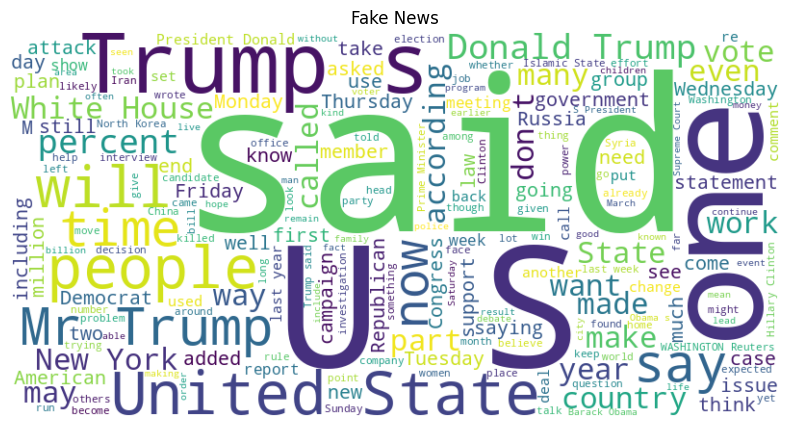

In [15]:
plot_wordcloud(fake_text, 'Fake News')
plt.show()

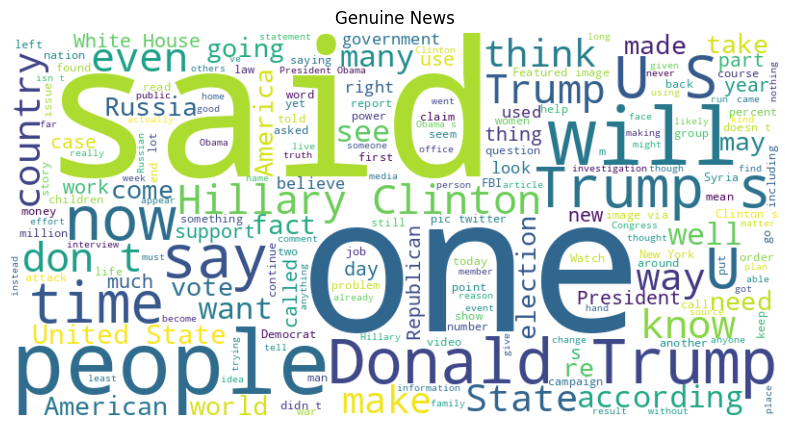

In [16]:
plot_wordcloud(real_text, 'Genuine News')
plt.show()

# Step 5: Text preprocessing

In [17]:
text_column = 'text'
label_column = 'label'

In [20]:
stopword = set(stopwords.words('english'))
stopword

{'a',
 'about',
 'above',
 'after',
 'again',
 'against',
 'ain',
 'all',
 'am',
 'an',
 'and',
 'any',
 'are',
 'aren',
 "aren't",
 'as',
 'at',
 'be',
 'because',
 'been',
 'before',
 'being',
 'below',
 'between',
 'both',
 'but',
 'by',
 'can',
 'couldn',
 "couldn't",
 'd',
 'did',
 'didn',
 "didn't",
 'do',
 'does',
 'doesn',
 "doesn't",
 'doing',
 'don',
 "don't",
 'down',
 'during',
 'each',
 'few',
 'for',
 'from',
 'further',
 'had',
 'hadn',
 "hadn't",
 'has',
 'hasn',
 "hasn't",
 'have',
 'haven',
 "haven't",
 'having',
 'he',
 'her',
 'here',
 'hers',
 'herself',
 'him',
 'himself',
 'his',
 'how',
 'i',
 'if',
 'in',
 'into',
 'is',
 'isn',
 "isn't",
 'it',
 "it's",
 'its',
 'itself',
 'just',
 'll',
 'm',
 'ma',
 'me',
 'mightn',
 "mightn't",
 'more',
 'most',
 'mustn',
 "mustn't",
 'my',
 'myself',
 'needn',
 "needn't",
 'no',
 'nor',
 'not',
 'now',
 'o',
 'of',
 'off',
 'on',
 'once',
 'only',
 'or',
 'other',
 'our',
 'ours',
 'ourselves',
 'out',
 'over',
 'own',
 'r

In [21]:
stopwords.fileids()

['arabic',
 'azerbaijani',
 'basque',
 'bengali',
 'catalan',
 'chinese',
 'danish',
 'dutch',
 'english',
 'finnish',
 'french',
 'german',
 'greek',
 'hebrew',
 'hinglish',
 'hungarian',
 'indonesian',
 'italian',
 'kazakh',
 'nepali',
 'norwegian',
 'portuguese',
 'romanian',
 'russian',
 'slovene',
 'spanish',
 'swedish',
 'tajik',
 'turkish']

In [22]:
string.punctuation

'!"#$%&\'()*+,-./:;<=>?@[\\]^_`{|}~'

In [23]:
def preprocess_text(text):
    # Remove punctuation
    remove_punc = [char for char in text if char not in string.punctuation]
    clean_words = ''.join(remove_punc) # char joining

    #Remove stopwords
    text = ([word for word in clean_words.split() if word.lower() not in stopword]) # stopword = stopwords.words('english')
    return text


In [24]:
data[text_column] = data[text_column].apply(preprocess_text)

In [25]:
data[text_column]

,text
0,"[comment, expected, Barack, Obama, Members, FY..."
1,"[post, votes, Hillary, already]"
2,"[demonstrators, gathered, last, night, exercis..."
3,"[dozen, politically, active, pastors, came, pr..."
4,"[RS28, Sarmat, missile, dubbed, Satan, 2, repl..."
...,...
72129,"[WASHINGTON, Reuters, Hackers, believed, worki..."
72130,"[know, fantasyland, Republicans, never, questi..."
72131,"[Migrants, Refuse, Leave, Train, Refugee, Camp..."
72132,"[MEXICO, CITY, Reuters, Donald, Trump’s, comba..."


# Step 6: Lemmatization

In [28]:
import nltk
nltk.download('wordnet')

[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


True

In [29]:
lemmatizer = WordNetLemmatizer()

def lemmatize_text(text):
    lemmatized_text = ' '.join([lemmatizer.lemmatize(word) for word in text])
    return lemmatized_text

data[text_column] = data[text_column].apply(lemmatize_text)

In [30]:
data[text_column]

,text
0,comment expected Barack Obama Members FYF911 F...
1,post vote Hillary already
2,demonstrator gathered last night exercising co...
3,dozen politically active pastor came private d...
4,RS28 Sarmat missile dubbed Satan 2 replace SS1...
...,...
72129,WASHINGTON Reuters Hackers believed working Ru...
72130,know fantasyland Republicans never questioned ...
72131,Migrants Refuse Leave Train Refugee Camp Hunga...
72132,MEXICO CITY Reuters Donald Trump’s combative s...


# Step 7: TF-IDF Vectorization

In [31]:
vectorizer = TfidfVectorizer()

x = vectorizer.fit_transform(data[text_column])
y = data[label_column]


In [32]:
x

<72134x363127 sparse matrix of type '<class 'numpy.float64'>'
	with 14808182 stored elements in Compressed Sparse Row format>

# Step 8: Split dataset into training and testing sets

In [33]:
xtrain, xtest, ytrain, ytest = train_test_split(x, labels, test_size=0.3, random_state=42)

# Step 09: Evaluate Naive Bayes models

In [34]:
def evaluate_model(model, xtest, ytest):
    y_pred = model.predict(xtest)
    accuracy = accuracy_score(ytest, y_pred)
    cm = confusion_matrix(ytest, y_pred)
    prob = model.predict_proba(xtest)[:, 1]
    roc_auc = roc_auc_score(ytest, prob)
    fpr, tpr, thresholds = roc_curve(ytest, prob)
    precision, recall, _ = precision_recall_curve(ytest, prob)
    pr_auc = auc(recall, precision)

    return {
        'Accuracy': accuracy,
        'Confusion Matrix': cm,
    }

# Step 10: Build Naive Bayes models

# Multinomial Naive Bayes

In [35]:
mnb_model = MultinomialNB(alpha=1.0, fit_prior=True, class_prior=None)
mnb_model.fit(xtrain, ytrain)

MultinomialNB()

In [36]:
from sklearn.metrics import precision_recall_curve, auc

In [37]:
nb_results = evaluate_model(mnb_model, xtest, ytest)
nb_results

{'Accuracy': 0.8766692851531814,
 'Confusion Matrix': array([[9713,  900],
        [1769, 9259]])}

# Evaluate Manually

In [38]:
cm = confusion_matrix(ytest, mnb_model.predict(xtest))
cm

array([[9713,  900],
       [1769, 9259]])

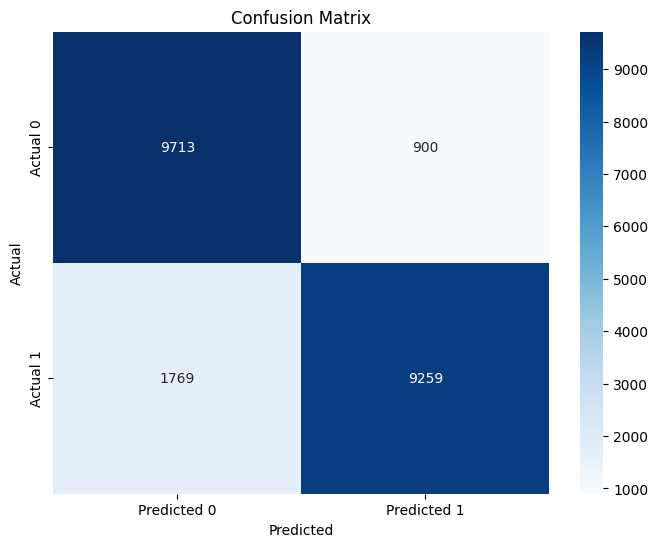

In [39]:
# Create a heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
            xticklabels=['Predicted 0', 'Predicted 1'],
            yticklabels=['Actual 0', 'Actual 1'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

In [40]:
print(classification_report(ytest, mnb_model.predict(xtest)))

              precision    recall  f1-score   support

           0       0.85      0.92      0.88     10613
           1       0.91      0.84      0.87     11028

    accuracy                           0.88     21641
   macro avg       0.88      0.88      0.88     21641
weighted avg       0.88      0.88      0.88     21641



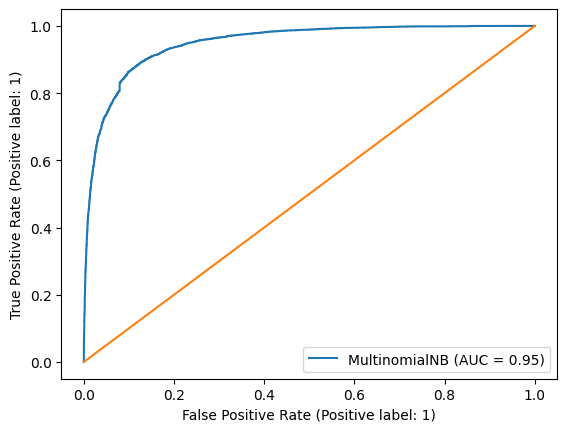

In [41]:
plot_roc_curve(mnb_model, xtest, ytest)
plt.plot([0,1],[0,1])

# Bernoulli Naive Bayes

In [42]:
bnb_model = BernoulliNB(alpha=1.0, binarize=0.0, fit_prior=True, class_prior=None)
bnb_model.fit(xtrain, ytrain)

BernoulliNB()

In [43]:
bnb_results = evaluate_model(bnb_model, xtest, ytest)
bnb_results

{'Accuracy': 0.8547664156000185,
 'Confusion Matrix': array([[8575, 2038],
        [1105, 9923]])}

In [44]:
cm_bnb = confusion_matrix(ytest, bnb_model.predict(xtest))
cm_bnb

array([[8575, 2038],
       [1105, 9923]])

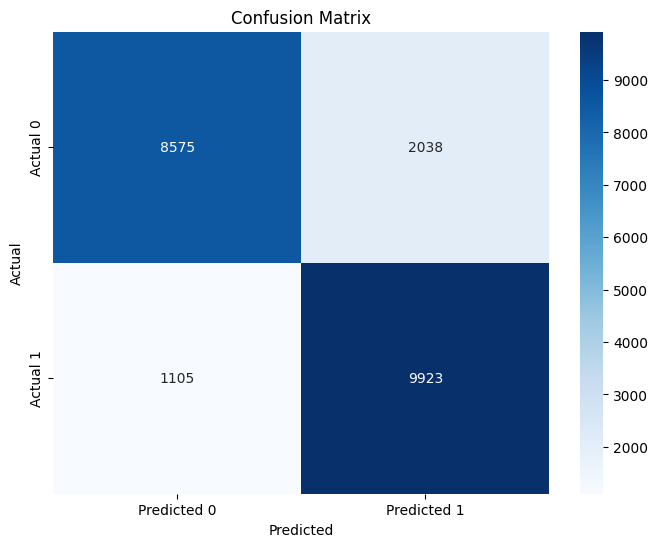

In [45]:
# Create a heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(cm_bnb, annot=True, fmt='d', cmap='Blues',
            xticklabels=['Predicted 0', 'Predicted 1'],
            yticklabels=['Actual 0', 'Actual 1'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

In [46]:
print(classification_report(ytest, bnb_model.predict(xtest)))

              precision    recall  f1-score   support

           0       0.89      0.81      0.85     10613
           1       0.83      0.90      0.86     11028

    accuracy                           0.85     21641
   macro avg       0.86      0.85      0.85     21641
weighted avg       0.86      0.85      0.85     21641



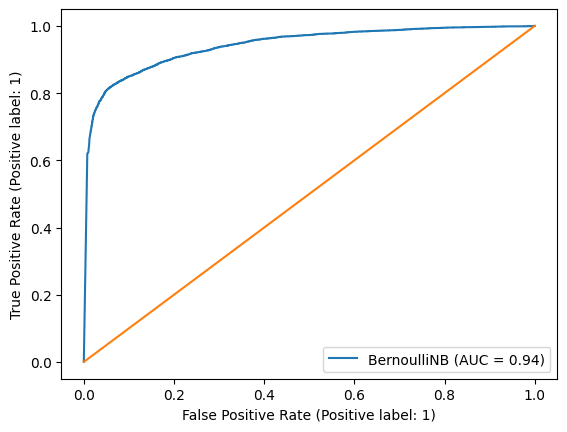

In [47]:
plot_roc_curve(bnb_model, xtest, ytest)
plt.plot([0,1],[0,1])

# Step 11: Apply Logistic Regression

In [48]:
lr_model = LogisticRegression(max_iter=1000)
lr_model.fit(xtrain, ytrain)

LogisticRegression(max_iter=1000)

# Step 12: Evaluate Logistic Regression

In [49]:
lr_results = evaluate_model(lr_model, xtest, ytest)

In [50]:
lr_results

{'Accuracy': 0.9511575250681576,
 'Confusion Matrix': array([[ 9974,   639],
        [  418, 10610]])}

In [51]:
cm_lr = confusion_matrix(ytest, lr_model.predict(xtest))
cm_lr

array([[ 9974,   639],
       [  418, 10610]])

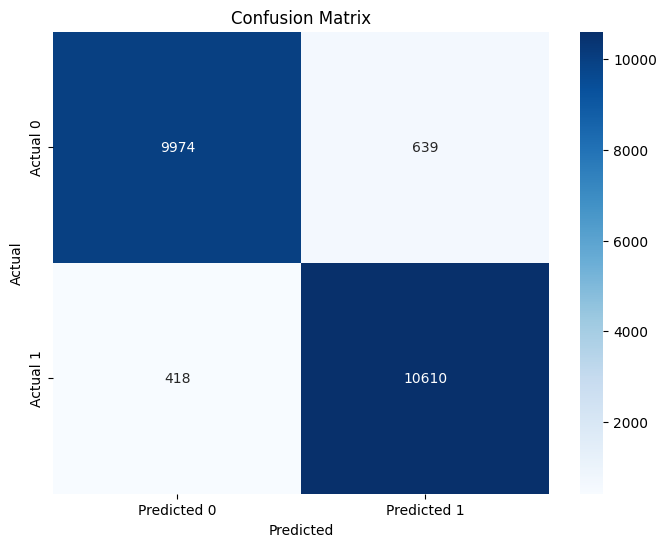

In [52]:
# Create a heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(cm_lr, annot=True, fmt='d', cmap='Blues',
            xticklabels=['Predicted 0', 'Predicted 1'],
            yticklabels=['Actual 0', 'Actual 1'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

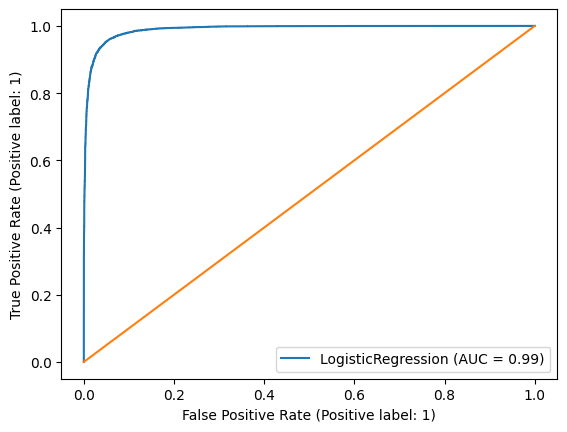

In [53]:
plot_roc_curve(lr_model, xtest, ytest)
plt.plot([0,1],[0,1])

# Step 13: Visualize performance with histogram

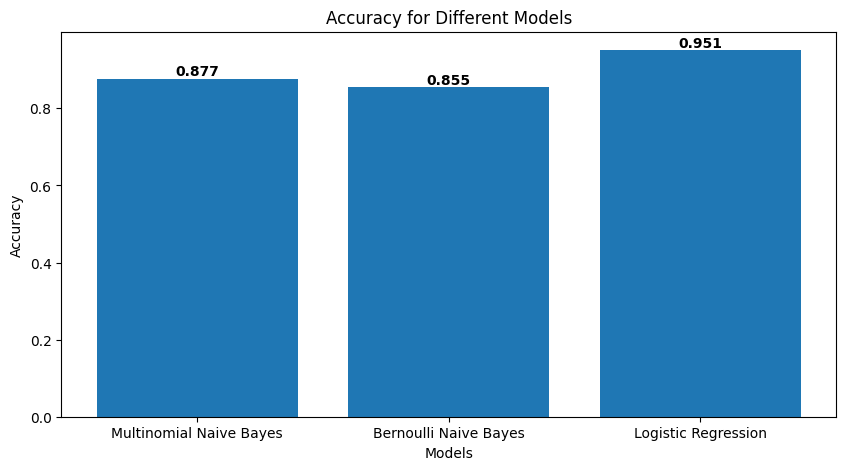

In [54]:
def plot_histogram(metric_values, model_names, metric_name):
    fig, ax = plt.subplots(figsize=(10, 5))
    bars = plt.bar(model_names, metric_values)
    plt.xlabel('Models')
    plt.ylabel(metric_name)
    plt.title(f'{metric_name} for Different Models')

    for bar in bars:
        yval = bar.get_height()
        ax.text(bar.get_x() + bar.get_width()/2, yval, round(yval, 3), ha='center', va='bottom', color='black', fontweight='bold')

    plt.show()

accuracy_values = [nb_results['Accuracy'], bnb_results['Accuracy'], lr_results['Accuracy']]
model_names = ['Multinomial Naive Bayes', 'Bernoulli Naive Bayes', 'Logistic Regression']
plot_histogram(accuracy_values, model_names, 'Accuracy')


# Step 14: Input random text and make a prediction

In [55]:
models = [mnb_model, bnb_model, lr_model]

In [56]:
random_text = input()

preprocessed_text = preprocess_text(random_text) # remove punctuation
lemmatized_text = lemmatize_text(preprocessed_text) # text scaling
text_vector = vectorizer.transform([lemmatized_text])

Migrants Refuse To Leave Train At Refugee Camp In Hungary\n\nThousands of migrants flooded into a train station in the Hungarian capital Thursday after police lifted a two-day blockade, but some who boarded a train they thought was going to Germany ended up instead at a refugee camp just miles from Budapest.\n\nThe Associated Press reports that "excited migrants piled into a newly arrived train at the Keleti station in Hungary\'s capital despite announcements in Hungarian and English that all services from the station to Western Europe had been canceled. A statement on the main departures board said no more trains to Austria or Germany would depart \'due to safety reasons until further notice!\'\n\n"Many migrants, who couldn\'t understand either language and were receiving no advice from Hungarian officials, scrambled aboard in a standing-room-only crush and hoped for the best," the AP said.\n\nScuffles broke out when police ordered the passengers off the train at Bicske, according to 

In [57]:
preprocessed_text

['Migrants',
 'Refuse',
 'Leave',
 'Train',
 'Refugee',
 'Camp',
 'HungarynnThousands',
 'migrants',
 'flooded',
 'train',
 'station',
 'Hungarian',
 'capital',
 'Thursday',
 'police',
 'lifted',
 'twoday',
 'blockade',
 'boarded',
 'train',
 'thought',
 'going',
 'Germany',
 'ended',
 'instead',
 'refugee',
 'camp',
 'miles',
 'BudapestnnThe',
 'Associated',
 'Press',
 'reports',
 'excited',
 'migrants',
 'piled',
 'newly',
 'arrived',
 'train',
 'Keleti',
 'station',
 'Hungarys',
 'capital',
 'despite',
 'announcements',
 'Hungarian',
 'English',
 'services',
 'station',
 'Western',
 'Europe',
 'canceled',
 'statement',
 'main',
 'departures',
 'board',
 'said',
 'trains',
 'Austria',
 'Germany',
 'would',
 'depart',
 'due',
 'safety',
 'reasons',
 'noticennMany',
 'migrants',
 'couldnt',
 'understand',
 'either',
 'language',
 'receiving',
 'advice',
 'Hungarian',
 'officials',
 'scrambled',
 'aboard',
 'standingroomonly',
 'crush',
 'hoped',
 'best',
 'AP',
 'saidnnScuffles',
 'bro

In [58]:
lemmatized_text

'Migrants Refuse Leave Train Refugee Camp HungarynnThousands migrant flooded train station Hungarian capital Thursday police lifted twoday blockade boarded train thought going Germany ended instead refugee camp mile BudapestnnThe Associated Press report excited migrant piled newly arrived train Keleti station Hungarys capital despite announcement Hungarian English service station Western Europe canceled statement main departure board said train Austria Germany would depart due safety reason noticennMany migrant couldnt understand either language receiving advice Hungarian official scrambled aboard standingroomonly crush hoped best AP saidnnScuffles broke police ordered passenger train Bicske according BBCnnMeanwhile Hungarys prime minister say country manage growing migrant crisis even European official said meet month Brussels discus effort strengthen European response situationnnViktor Orban said influx refugee country really German problem intended destination Hungarians along Europ

In [59]:
text_vector

<1x363127 sparse matrix of type '<class 'numpy.float64'>'
	with 195 stored elements in Compressed Sparse Row format>

In [60]:
text_vector.toarray()

array([[0., 0., 0., ..., 0., 0., 0.]])

In [61]:
for model in models:
    prediction = model.predict(text_vector)
    print(f"Model: {type(model).__name__}")
    print("Prediction:", prediction)
    print('\n')

Model: MultinomialNB
Prediction: [0]


Model: BernoulliNB
Prediction: [0]


Model: LogisticRegression
Prediction: [0]




# Step 16: Save Good ML Model for Deployment

In [62]:
import pickle

# Define a file path where you want to save the model
model_file_path = 'logistic_regression_model.pkl'

# Save the model to the file
with open(model_file_path, 'wb') as model_file:
    pickle.dump(lr_model, model_file)


# Load Model

In [63]:
with open(model_file_path, 'rb') as model_file:
    loaded_LR = pickle.load(model_file)

In [64]:
loaded_LR.predict(xtest)

array([1, 1, 0, ..., 1, 1, 0])

In [65]:
loaded_LR.score(xtest, ytest)

0.9511575250681576

In [66]:
text_vector

<1x363127 sparse matrix of type '<class 'numpy.float64'>'
	with 195 stored elements in Compressed Sparse Row format>

In [67]:
loaded_LR.predict(text_vector)

array([0])